In [458]:
import pandas
from pandas import read_excel, to_datetime, DataFrame, concat
from pandas.plotting import lag_plot, autocorrelation_plot
from datetime import datetime, timedelta
import dateutil.relativedelta
import statistics
from matplotlib import pyplot
from numpy import logical_not

In [242]:
# cambiamos el valor de estos 4 parametros para que nos muestre dataframes sin truncarlos
# pandas.set_option('display.max_rows', 75)
pandas.set_option('display.max_columns', None)
pandas.set_option('display.width', None)
pandas.set_option('display.max_colwidth', None)

In [243]:
# vamos a estudiar vencimiento recibos 1o seguro_salud_90 q esta en 5o lugar en numero observaciones y en 10o lugar en cuantia
# de las mismas.

In [244]:
# Load data using read_excel
transacciones_df = read_excel('20210513 mmelero (249236).xlsx', sheet_name='Hoja1')
transacciones_df

,Fecha transacción,Importe,ID Categoría,Nombre categoría,Nivel categoría,iD categoría padre,Nombre categoría padre,Proveedor,Marca,Sector,Financiero,Transferencia,Unnamed: 12,Unnamed: 13,ID,BALANCE,BALANCE_DATE
0,2020-07-24,-1.20,84.0,parking_84,2.0,5.0,vehiculos_5,NaN,NaN,NaN,False,False,NaN,NaN,249236.0,1478.98,2020-07-26
1,2020-07-23,-4.50,117.0,regalos_celebraciones_117,2.0,8.0,gastos_personales_8,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaT
2,2020-07-23,-13.53,70.0,supermercados_70,2.0,4.0,alimentacion_4,SPAR,SPAR,Supermercados,False,False,NaN,NaN,NaN,NaN,NaT
3,2020-07-22,-51.40,222.0,adsl_222,3.0,521.0,Comunicaciones y TV,Jazz Telecom,Jazztel,Compañías telecomunicaciones,False,False,NaN,NaN,NaN,NaN,NaT
4,2020-07-22,-11.00,70.0,supermercados_70,2.0,4.0,alimentacion_4,Mercadona,Mercadona,Supermercados,False,False,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,2016-09-05,1533.02,18.0,retribucion_liquida_18,3.0,576.0,Nómina,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaT
1483,2016-09-05,-617.47,126.0,liquidacion_tarjeta_126,3.0,478.0,tarjetas_credito_478,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaT
1484,2016-09-05,-138.08,125.0,cuotas_125,3.0,127.0,otros_pasivos_127,NaN,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaT
1485,2016-09-01,-32.22,90.0,seguro_salud_90,2.0,6.0,salud_6,Sanitas S.A. de Seguros,Sanitas,Seguros de salud,True,False,NaN,NaN,NaN,NaN,NaT


In [245]:
# nos quedamos con categoria desde 'Fecha transacción' hasta 'Nombre Categoría'
transacciones_df=transacciones_df.iloc[:,0:4]
transacciones_df

,Fecha transacción,Importe,ID Categoría,Nombre categoría
0,2020-07-24,-1.20,84.0,parking_84
1,2020-07-23,-4.50,117.0,regalos_celebraciones_117
2,2020-07-23,-13.53,70.0,supermercados_70
3,2020-07-22,-51.40,222.0,adsl_222
4,2020-07-22,-11.00,70.0,supermercados_70
...,...,...,...,...
1482,2016-09-05,1533.02,18.0,retribucion_liquida_18
1483,2016-09-05,-617.47,126.0,liquidacion_tarjeta_126
1484,2016-09-05,-138.08,125.0,cuotas_125
1485,2016-09-01,-32.22,90.0,seguro_salud_90


In [246]:
# vemos que la categoria '90' de 'seguro_salud_90' es la 5a en numero de transacciones y la 10a en cuantia de las mismas así que
# vamos a quedarnos sólo como las transacciones de esta categoria y hacer un estudio estadistico temporal de las mismas

In [247]:
# nos quedamos con las transacciones de la categoria 'seguro_salud_90'
transacciones_90_df=transacciones_df[transacciones_df['ID Categoría'] == 90.0]
transacciones_90_df

,Fecha transacción,Importe,ID Categoría,Nombre categoría
303,2019-04-10,72.38,90.0,seguro_salud_90
338,2019-03-01,-71.10,90.0,seguro_salud_90
339,2019-03-01,-37.07,90.0,seguro_salud_90
352,2019-02-14,-71.10,90.0,seguro_salud_90
374,2019-02-01,-37.07,90.0,seguro_salud_90
375,2019-02-01,-71.10,90.0,seguro_salud_90
401,2019-01-02,-37.07,90.0,seguro_salud_90
403,2019-01-02,-72.38,90.0,seguro_salud_90
404,2019-01-02,-5.00,90.0,seguro_salud_90
440,2018-12-03,-66.85,90.0,seguro_salud_90


In [248]:
# quitamos las columnas de 'ID Categoría' y 'Nombre Categoría' que ya no nos aportan nada
transacciones_90_df.drop(columns=['ID Categoría', 'Nombre categoría'], inplace=True)
transacciones_90_df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Fecha transacción,Importe
303,2019-04-10,72.38
338,2019-03-01,-71.10
339,2019-03-01,-37.07
352,2019-02-14,-71.10
374,2019-02-01,-37.07
375,2019-02-01,-71.10
401,2019-01-02,-37.07
403,2019-01-02,-72.38
404,2019-01-02,-5.00
440,2018-12-03,-66.85


In [249]:
# renombramos columnas
transacciones_90_df.rename(columns={'Fecha transacción': 'FECHA', 'Importe': 'IMPORTE'}, inplace=True)
transacciones_90_df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,FECHA,IMPORTE
303,2019-04-10,72.38
338,2019-03-01,-71.10
339,2019-03-01,-37.07
352,2019-02-14,-71.10
374,2019-02-01,-37.07
375,2019-02-01,-71.10
401,2019-01-02,-37.07
403,2019-01-02,-72.38
404,2019-01-02,-5.00
440,2018-12-03,-66.85


In [250]:
# ordenamos las fechas por orden ascendente
transacciones_90_df.sort_values(by=['FECHA'], ascending=True, inplace=True, ignore_index=True)
transacciones_90_df

<ipython-input-250-bb25adde342d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transacciones_90_df.sort_values(by=['FECHA'], ascending=True, inplace=True, ignore_index=True)


,FECHA,IMPORTE
0,2016-09-01,-32.22
1,2016-10-03,-37.22
2,2016-11-02,-32.22
3,2016-12-01,-32.22
4,2017-01-02,-47.22
5,2017-02-01,-32.22
6,2017-03-01,-32.22
7,2017-04-03,-25.00
8,2017-04-03,-35.10
9,2017-05-03,-34.48


In [251]:
# vamos a agrupar los valores y sumarlos por fecha para agrupar cargos distintos realizados el mismo dia
transacciones_90_df=transacciones_90_df.groupby(['FECHA']).sum()
transacciones_90_df

,IMPORTE
FECHA,
2016-09-01,-32.22
2016-10-03,-37.22
2016-11-02,-32.22
2016-12-01,-32.22
2017-01-02,-47.22
2017-02-01,-32.22
2017-03-01,-32.22
2017-04-03,-60.10
2017-05-03,-34.48


In [252]:
# vamos a hacer dos estudios estadisticos:
# uno para el dataframe sin rellenar con ceros las fechas que faltan para ver la distribucion estadistica del importe y sus 
# parametros.
# otro para el dataframe poniendo importe 0 en las fechas que faltan para ver la distribucion estadistica del dia de pago
# y poder dar avisos (podremos apoyarnos en funcionalidad aviso impago nomina)

In [253]:
transacciones_90_df.dtypes

IMPORTE    float64
dtype: object

In [254]:
# convertimos el indice a formato datetime por si acaso aun no estaba convertido
transacciones_90_df.index = to_datetime(transacciones_90_df.index)
transacciones_90_df

,IMPORTE
FECHA,
2016-09-01,-32.22
2016-10-03,-37.22
2016-11-02,-32.22
2016-12-01,-32.22
2017-01-02,-47.22
2017-02-01,-32.22
2017-03-01,-32.22
2017-04-03,-60.10
2017-05-03,-34.48


In [255]:
transacciones_90_df.dtypes

IMPORTE    float64
dtype: object

In [256]:
# transacciones_90_df.loc['2019-4-10']['IMPORTE'] = -transacciones_90_df.loc['2019-4-10']['IMPORTE']
# transacciones_90_df

In [257]:
# para que los datos sean más fáciles de interpretar vamos a hacerlos todos positivos multiplicandolos por '-1'
transacciones_90_df['IMPORTE']=-transacciones_90_df['IMPORTE']
transacciones_90_df

,IMPORTE
FECHA,
2016-09-01,32.22
2016-10-03,37.22
2016-11-02,32.22
2016-12-01,32.22
2017-01-02,47.22
2017-02-01,32.22
2017-03-01,32.22
2017-04-03,60.10
2017-05-03,34.48


In [258]:
transacciones_90_df.dtypes

IMPORTE    float64
dtype: object

In [259]:
transacciones_90_df.size

33

In [260]:
transacciones_90_df.shape

(33, 1)

In [261]:
statistics.mode(transacciones_90_df['IMPORTE'])

32.22

In [262]:
transacciones_90_df.describe()

,IMPORTE
count,33.000000
mean,68.868182
std,48.753197
min,-72.380000
25%,34.480000
50%,49.480000
75%,103.920000
max,201.750000


In [263]:
"""
mean = 68.86 eur lo que indica que probablemente la cuenta tiene 2 titulares (1 seguro medico aprox. 40 eur/mes)
q2 = 49.48 eur
moda = 32.22 eur q no es un valor significativo
"""

'\nmean = 68.86 eur lo que indica que probablemente la cuenta tiene 2 titulares (1 seguro medico aprox. 40 eur/mes)\nq2 = 49.48 eur\nmoda = 32.22 eur q no es un valor significativo\n'

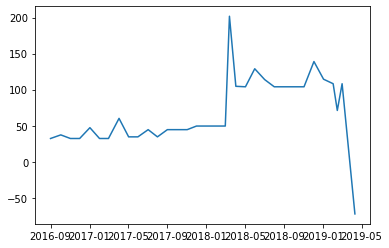

In [264]:
pyplot.plot(transacciones_90_df)
pyplot.show()

In [265]:
"""
Vemos que en la 1a mitad de la serie habia un asegurado y en la 2a mitad de la serie la cuota se dobla.
El ultimo valor del seguro probablemente sea un reembolso o una cancelacion o una devolucion de un fianza al darse de baja en
el seguro lo mimso que en febrero/marzo de 2018 hay un pago de 200 eur que es un outlier que problemente sea una fianza al dar
de alta un nuevo titular en el seguro medico
"""

'\nVemos que en la 1a mitad de la serie habia un asegurado y en la 2a mitad de la serie la cuota se dobla.\nEl ultimo valor del seguro probablemente sea un reembolso o una cancelacion o una devolucion de un fianza al darse de baja en\nel seguro lo mimso que en febrero/marzo de 2018 hay un pago de 200 eur que es un outlier que problemente sea una fianza al dar\nde alta un nuevo titular en el seguro medico\n'

In [266]:
# Time Series Data Visualization with Python
# https://machinelearningmastery.com/time-series-data-visualization-with-python/

In [267]:
# 1. Time Series Line Plot

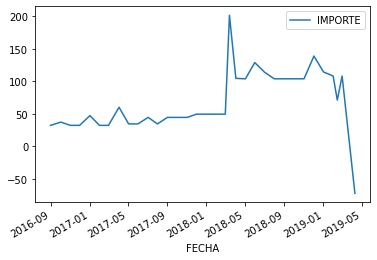

In [268]:
transacciones_90_df.plot()
pyplot.show()

In [271]:
"""
Vemos que en la 1a mitad de la serie habia un asegurado y en la 2a mitad de la serie la cuota se dobla.
El ultimo valor del seguro probablemente sea un reembolso o una cancelacion o una devolucion de un fianza al darse de baja en
el seguro lo mismo que en febrero/marzo de 2018 hay un pago de 200 eur que es un outlier que problemente sea una fianza al dar
de alta un nuevo titular en el seguro medico.
"""

'\nVemos que en la 1a mitad de la serie habia un asegurado y en la 2a mitad de la serie la cuota se dobla.\nEl ultimo valor del seguro probablemente sea un reembolso o una cancelacion o una devolucion de un fianza al darse de baja en\nel seguro lo mismo que en febrero/marzo de 2018 hay un pago de 200 eur que es un outlier que problemente sea una fianza al dar\nde alta un nuevo titular en el seguro medico.\n'

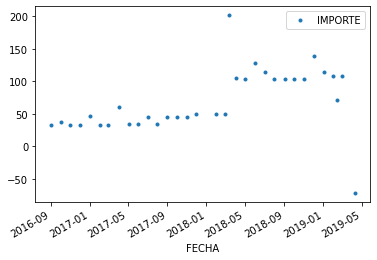

In [272]:
transacciones_90_df.plot(style='.')
pyplot.show()

In [273]:
# TODO:
# no hacemos plots por años comparando para 2017, 2018, 2019 que son los años enteros para los que tengo datos de momento
# pq no aportarian gran cosa
# vemos que la serie temporal tiene una tendencia plana sin estacionalidad que solo se ve alterada en 2018-01 por al adición
# de un asegurado o el pago de una franquicia y en 2019-04 cuando hay un reembolso/cancelacion probablemente por la cancelación
# del seguro

In [274]:
# 2. Time Series Histogram and Density Plots

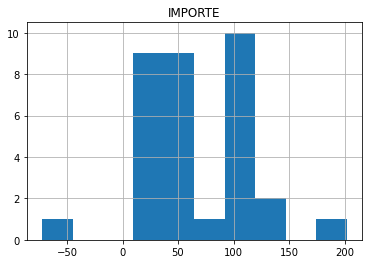

In [275]:
transacciones_90_df.hist()
pyplot.show()

In [276]:
"""
El histograma nos muestra claramente dos distribuciones.
una con una media entre 0 y 50 eur para la 1a mitad de la serie temporal y otra con una media de 100 eur.
Vemos dos outliers ya comentados anteriormente: uno de 200 eur y otro de -50 eur
"""

'\nEl histograma nos muestra claramente dos distribuciones.\nuna con una media entre 0 y 50 eur para la 1a mitad de la serie temporal y otra con una media de 100 eur.\nVemos dos outliers ya comentados anteriormente: uno de 200 eur y otro de -50 eur\n'

In [277]:
transacciones_90_df.describe()

,IMPORTE
count,33.000000
mean,68.868182
std,48.753197
min,-72.380000
25%,34.480000
50%,49.480000
75%,103.920000
max,201.750000


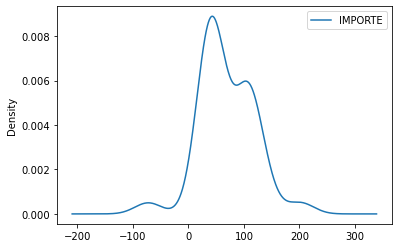

In [278]:
transacciones_90_df.plot(kind='kde')
pyplot.show()

In [279]:
"""
El diagrama de densidad solo confirma, aunque de forma más suave y oculta, las conclusiones que ya hemos comentado al observar 
el histograma de la distribución:

El histograma nos muestra claramente dos distribuciones.
una con una media entre 0 y 50 eur para la 1a mitad de la serie temporal y otra con una media de 100 eur.
Vemos dos outliers ya comentados anteriormente: uno de 200 eur y otro de -50 eur
"""

'\nEl diagrama de densidad solo confirma, aunque de forma más suave y oculta, las conclusiones que ya hemos comentado al observar \nel histograma de la distribución:\n\nEl histograma nos muestra claramente dos distribuciones.\nuna con una media entre 0 y 50 eur para la 1a mitad de la serie temporal y otra con una media de 100 eur.\nVemos dos outliers ya comentados anteriormente: uno de 200 eur y otro de -50 eur\n'

In [280]:
# 3. Time Series Box and Whisker Plots by Interval

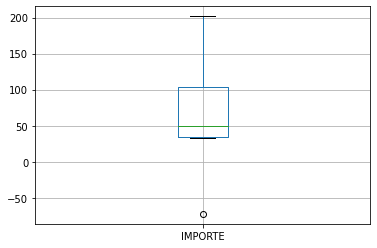

In [281]:
transacciones_90_df.boxplot()
pyplot.show()

In [282]:
"""
El boxplot confimar que la mediana esta en torno a q2 = 50 eur
q1 = 35 eur y q3 = 100 eur

Vemos que sólo esta considerado como outlier el ultimo valor de la serie de -72 eur
"""

'\nEl boxplot confimar que la mediana esta en torno a q2 = 50 eur\nq1 = 35 eur y q3 = 100 eur\n\nVemos que sólo esta considerado como outlier el ultimo valor de la serie de -72 eur\n'

In [283]:
transacciones_90_df.describe()

,IMPORTE
count,33.000000
mean,68.868182
std,48.753197
min,-72.380000
25%,34.480000
50%,49.480000
75%,103.920000
max,201.750000


In [284]:
"""
serie interesante hacer un boxplot desde 2016-09-01 hasta 2019-03-01 y otro desde 2019-03-02 hasta el final de la serie en
2019-04-10
"""

'\nserie interesante hacer un boxplot desde 2016-09-01 hasta 2019-03-01 y otro desde 2019-03-02 hasta el final de la serie en\n2019-04-10\n'

In [285]:
transacciones_90_df.index <= '2018-03-01'

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [286]:
mask = transacciones_90_df.index <= '2018-03-01'
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [287]:
logical_not(mask)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [288]:
transacciones_90_20180301_df = transacciones_90_df.loc[mask]

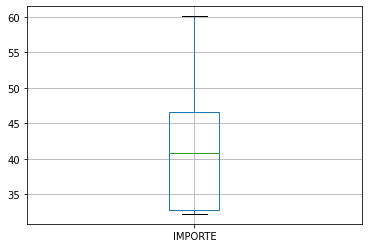

In [289]:
transacciones_90_20180301_df.boxplot()
pyplot.show()

In [290]:
transacciones_90_20180301_df.describe()

,IMPORTE
count,18.000000
mean,40.857778
std,8.382646
min,32.220000
25%,32.785000
50%,40.850000
75%,46.535000
max,60.100000


In [291]:
"""
se ve una diferencia muy clara entre los parametros de las dos distribuciones.
Vemos que ambas distribuciones estan muy agrupadas y la 2a mas que la primera
"""

'\nse ve una diferencia muy clara entre los parametros de las dos distribuciones.\nVemos que ambas distribuciones estan muy agrupadas y la 2a mas que la primera\n'

In [292]:
transacciones_90_after20180301_df  = transacciones_90_df.loc[logical_not(mask)]

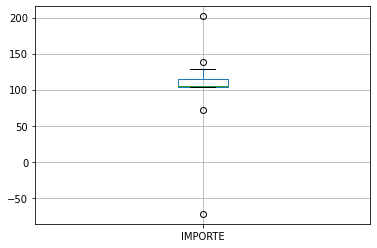

In [293]:
transacciones_90_after20180301_df.boxplot()
pyplot.show()

In [294]:
transacciones_90_after20180301_df.describe()

,IMPORTE
count,15.000000
mean,102.480667
std,55.931036
min,-72.380000
25%,103.920000
50%,104.590000
75%,114.185000
max,201.750000


In [295]:
# TODO:
# no hacemos plots por años comparando para 2017, 2018, 2019 que son los años enteros (ni por meses dentro de cada año) 
# para los que tengo datos de momento pq no aportarian gran cosa.
# vemos que la serie temporal tiene una tendencia plana sin estacionalidad que solo se ve alterada en 2018-01 por al adición
# de un asegurado o el pago de una franquicia y en 2019-04 cuando hay un reembolso/cancelacion probablemente por la cancelación
# del seguro

In [296]:
# 4. Time Series Heat Maps

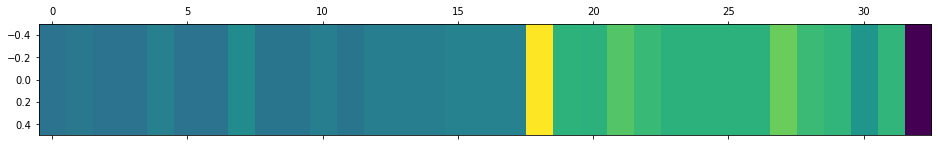

In [297]:
pyplot.matshow(transacciones_90_df.T, interpolation=None, aspect='auto')
pyplot.show()

In [298]:
"""
El heatmap nos vuelve a confirmar que hay dos distribuciones.
Una hasta el 2018-03-01 y otra despues con un outlier positivo el 2018-03-14 y otro negativo en el ultimo valor de la serie
"""

'\nEl heatmap nos vuelve a confirmar que hay dos distribuciones.\nUna hasta el 2018-03-01 y otra despues con un outlier positivo el 2018-03-14 y otro negativo en el ultimo valor de la serie\n'

In [299]:
# 5. Time Series Lag Scatter Plots

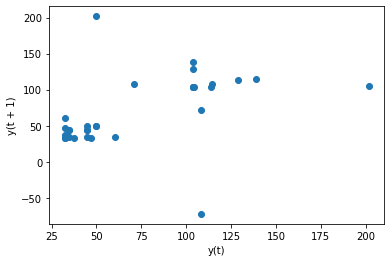

In [300]:
lag_plot(transacciones_90_df)
pyplot.show()

In [301]:
"""
no hay apenas correlacion entre y(t+1) e y(t)
"""

'\nno hay apenas correlacion entre y(t+1) e y(t)\n'

In [302]:
transacciones_90_df.shape

(33, 1)

In [303]:
transacciones_90_df.size

33

In [304]:
# vemos la correlacion entre y(t+1) y todos sus lags anteriores (33)

t+1 vs t-1


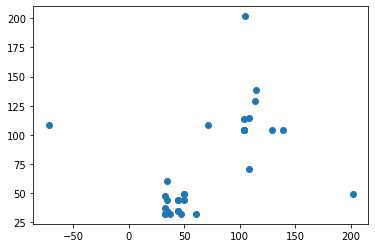

t+1 vs t-2


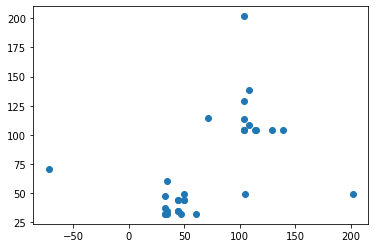

t+1 vs t-3


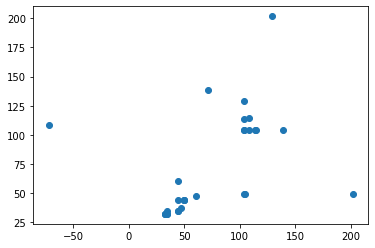

t+1 vs t-4


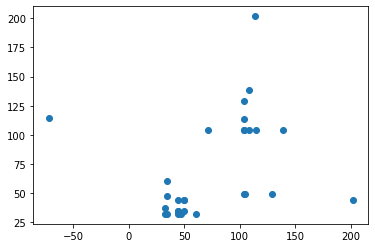

t+1 vs t-5


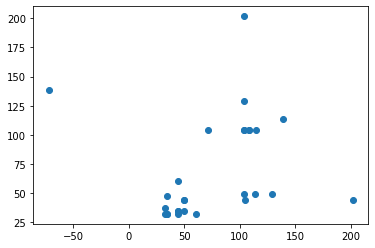

t+1 vs t-6


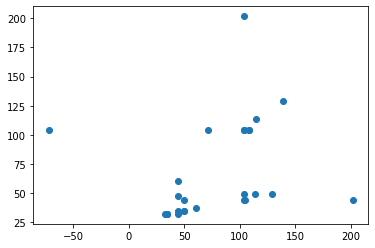

t+1 vs t-7


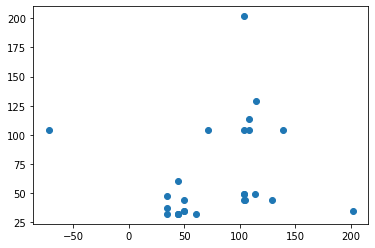

t+1 vs t-8


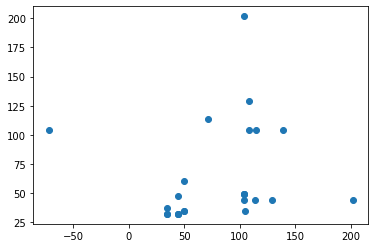

t+1 vs t-9


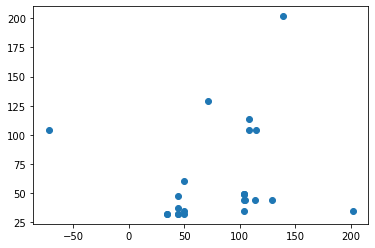

t+1 vs t-10


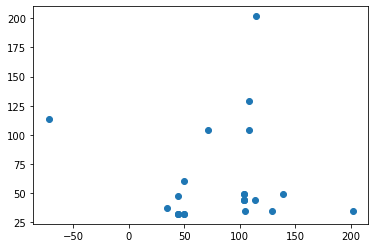

t+1 vs t-11


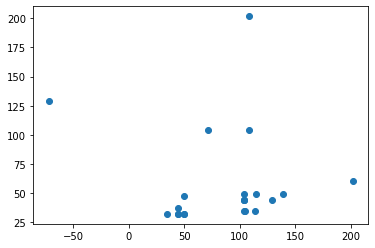

t+1 vs t-12


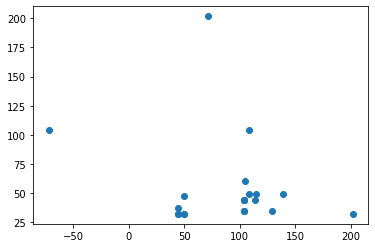

t+1 vs t-13


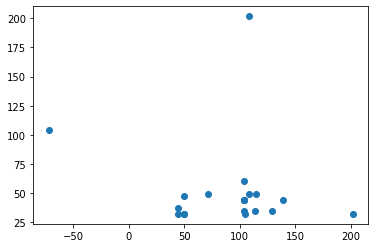

t+1 vs t-14


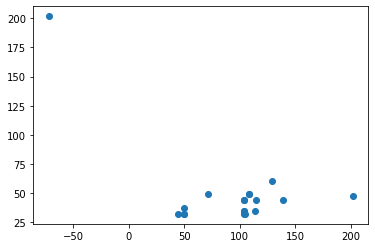

t+1 vs t-15


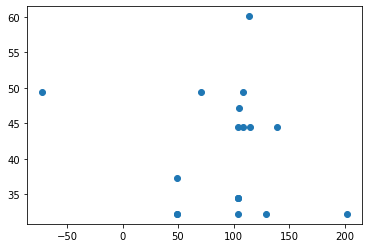

t+1 vs t-16


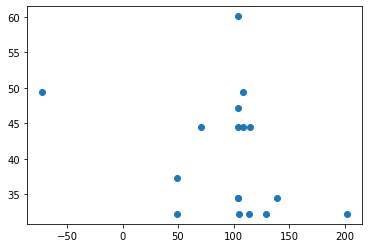

t+1 vs t-17


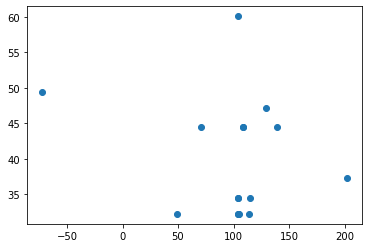

t+1 vs t-18


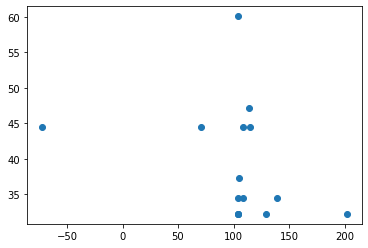

t+1 vs t-19


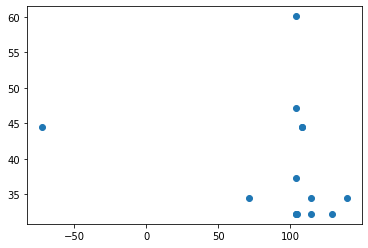

t+1 vs t-20


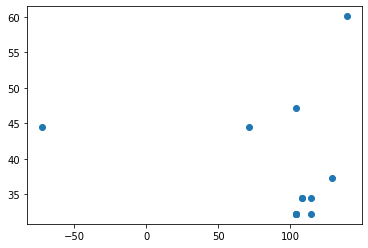

t+1 vs t-21


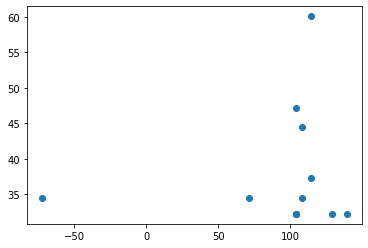

t+1 vs t-22


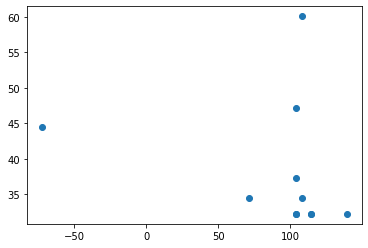

t+1 vs t-23


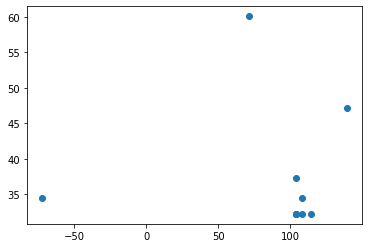

t+1 vs t-24


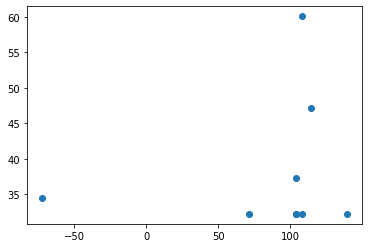

t+1 vs t-25


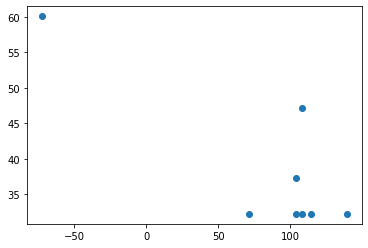

t+1 vs t-26


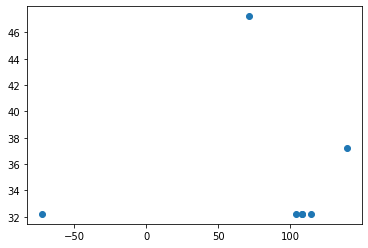

t+1 vs t-27


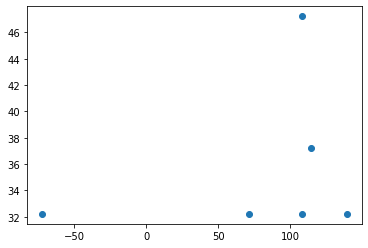

t+1 vs t-28


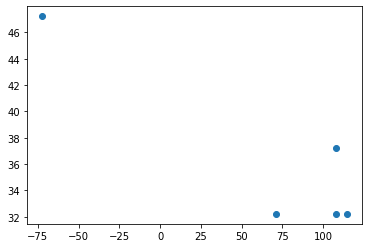

t+1 vs t-29


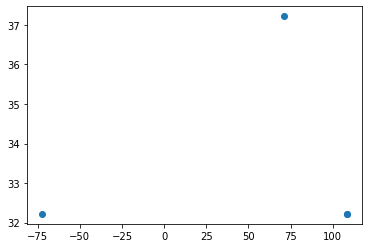

t+1 vs t-30


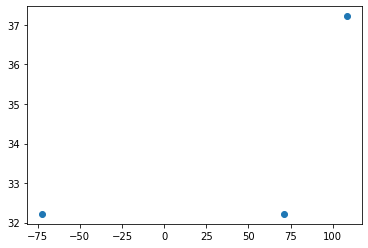

t+1 vs t-31


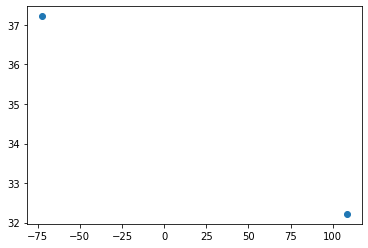

t+1 vs t-32


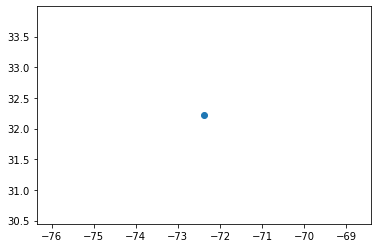

t+1 vs t-33


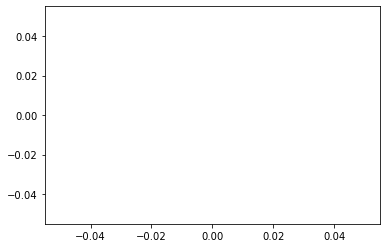

In [306]:
values = DataFrame(transacciones_90_df.values)
lags = transacciones_90_df.size
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
for i in range(1,(lags + 1)):
	print('t+1 vs t-' + str(i))
	pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
	pyplot.show()

In [307]:
"""
Vemos que hay una debil correlacion entre y(t+1) y algunos de sus lags anteriores.
Hay serias dudas de que esta serie temporal sea modelizable.

Confirmemos esta intuicion con el plot de autocorrelacion
"""

'\nVemos que hay una debil correlacion entre y(t+1) y algunos de sus lags anteriores.\nHay serias dudas de que esta serie temporal sea modelizable.\n\nConfirmemos esta intuicion con el plot de autocorrelacion\n'

In [308]:
# 6. Time Series Autocorrelation Plots

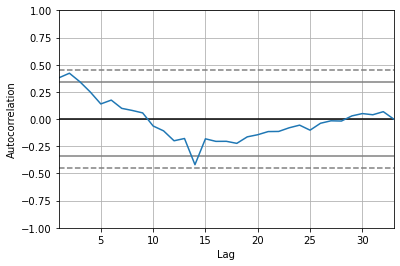

In [309]:
autocorrelation_plot(transacciones_90_df)
pyplot.show()

In [310]:
"""
No hay correlacion estadisticamente significativa (fuera de la linea de puntos) entre y(t+1) y ninguno de sus lags anteriores.
Esta serie temporal no es modelizable.
Quiza para precedir siguiente valor habría que utlizar la mediana (o mejor la media) de las ultimas 12 observaciones.
O la media de los ultimos 2-3 recibos.
"""

'\nNo hay correlacion estadisticamente significativa (fuera de la linea de puntos) entre y(t+1) y ninguno de sus lags anteriores.\nEsta serie temporal no es modelizable.\nQuiza para precedir siguiente valor habría que utlizar la mediana (o mejor la media) de las ultimas 12 observaciones.\nO la media de los ultimos 2-3 recibos.\n'

In [311]:
# A continuacion vamos a estudiar la distribucion estadistica del dia de pago del seguro medico

In [312]:
transacciones_90_df

,IMPORTE
FECHA,
2016-09-01,32.22
2016-10-03,37.22
2016-11-02,32.22
2016-12-01,32.22
2017-01-02,47.22
2017-02-01,32.22
2017-03-01,32.22
2017-04-03,60.10
2017-05-03,34.48


In [313]:
transacciones_90_dia_df=transacciones_90_df.copy()
transacciones_90_dia_df

,IMPORTE
FECHA,
2016-09-01,32.22
2016-10-03,37.22
2016-11-02,32.22
2016-12-01,32.22
2017-01-02,47.22
2017-02-01,32.22
2017-03-01,32.22
2017-04-03,60.10
2017-05-03,34.48


In [314]:
# hacemos una columna con la fecha a partir del índice
transacciones_90_dia_df['FECHA']=transacciones_90_dia_df.index
transacciones_90_dia_df

,IMPORTE,FECHA
FECHA,,
2016-09-01,32.22,2016-09-01
2016-10-03,37.22,2016-10-03
2016-11-02,32.22,2016-11-02
2016-12-01,32.22,2016-12-01
2017-01-02,47.22,2017-01-02
2017-02-01,32.22,2017-02-01
2017-03-01,32.22,2017-03-01
2017-04-03,60.10,2017-04-03
2017-05-03,34.48,2017-05-03


In [315]:
# hacemos una columna con el dia a partir de la columna de la fecha
transacciones_90_dia_df['DIA'] = transacciones_90_dia_df['FECHA'].dt.day
transacciones_90_dia_df

,IMPORTE,FECHA,DIA
FECHA,,,
2016-09-01,32.22,2016-09-01,1
2016-10-03,37.22,2016-10-03,3
2016-11-02,32.22,2016-11-02,2
2016-12-01,32.22,2016-12-01,1
2017-01-02,47.22,2017-01-02,2
2017-02-01,32.22,2017-02-01,1
2017-03-01,32.22,2017-03-01,1
2017-04-03,60.10,2017-04-03,3
2017-05-03,34.48,2017-05-03,3


In [316]:
# comprobamos tipos datos columnas
transacciones_90_dia_df.dtypes

IMPORTE           float64
FECHA      datetime64[ns]
DIA                 int64
dtype: object

In [317]:
# calculamos los estadisticos de la distribucion
transacciones_90_dia_df.describe()

,IMPORTE,DIA
count,33.000000,33.000000
mean,68.868182,2.757576
std,48.753197,3.335700
min,-72.380000,1.000000
25%,34.480000,1.000000
50%,49.480000,2.000000
75%,103.920000,3.000000
max,201.750000,14.000000


In [318]:
# calculamos la moda
stat_mode = statistics.mode(transacciones_90_dia_df['DIA'])
stat_mode

1

In [319]:
"""
Vemos como claramente el dia de pago del seguro medico es el primero de cada mes y como mucho es el dia 2 o 3.
Ya que mean = 2.75 y std = 3.33.
Y moda = q1 = 1; y q2 = 2 y q3 = 3.
"""

'\nVemos como claramente el dia de pago del seguro medico es el primero de cada mes y como mucho es el dia 2 o 3.\nYa que mean = 2.75 y std = 3.33.\nY moda = q1 = 1; y q2 = 2 y q3 = 3.\n'

In [320]:
# extraemos el 1er cuartil
quartil1_dist = int(transacciones_90_dia_df.describe().loc['25%']['DIA'])
quartil1_dist

1

In [321]:
# extraemos el 3er cuartil
quartil3_dist = int(transacciones_90_dia_df.describe().loc['75%']['DIA'])
quartil3_dist

3

In [322]:
iqr_dist = quartil3_dist - quartil1_dist
iqr_dist

2

In [323]:
# si NO pasan recibo a FIN DE MES
if stat_mode < 28:    
    iqr = iqr_dist
# si SÍ cobramos a FIN DE MES
else:
    # si quartil3_dist - quartil1_dist es mayor a 4 dias
    if iqr_dist > 4:
        iqr = 4
    else:
        iqr = iqr_dist
iqr

2

In [423]:
# pedimos al usuario la fecha (en produccion tomamos la fecha del sistema)
year = input('year: ')
month = input('month: ')
day = input('day: ')

year: 2019
month: 1
day: 1


In [424]:
# pasamos la fecha a string
current_date_str= year + '-' + month + '-' + day
current_date_str

'2019-1-1'

In [425]:
# pasamos la fecha al formato datetime
current_date_obj = datetime.strptime(current_date_str, '%Y-%m-%d')
current_date_obj

datetime.datetime(2019, 1, 1, 0, 0)

In [426]:
# pasamos iqr a formato datetime
iqr_obj = timedelta(days=iqr)
iqr_obj

datetime.timedelta(days=2)

In [427]:
# calculamos quartil3_obj en funcion de current_date_obj, quartil3_dist y si cobramos a FIN de MES o NO

# si SÍ cobramos a FIN de MES
if stat_mode >= 28:
    # quartil3_obj sera el ultimo dia del mes de current_date_obj
    quartil3 = calendar.monthrange(current_date_obj.year, current_date_obj.month)[1]
    quartil3_str = str(current_date_obj.year) + '-' + str(current_date_obj.month) + '-' + str(quartil3)
# si NO cobramos a FIN de MES    
else:
    quartil3_str = str(current_date_obj.year) + '-' + str(current_date_obj.month) + '-' + str(quartil3_dist)

quartil3_str

'2019-1-3'

In [428]:
q3_obj = datetime.strptime(quartil3_str, '%Y-%m-%d')
q3_obj

datetime.datetime(2019, 1, 3, 0, 0)

In [429]:
q1_obj = q3_obj - iqr_obj
q1_obj

datetime.datetime(2019, 1, 1, 0, 0)

In [430]:
limInf_obj = q1_obj - 1.5*iqr_obj
# quitamos partes de dias no enteros que haya podido introducir 1.5*iqr_obj
limInf_obj=limInf_obj.replace(hour=0, minute=0, second=0, microsecond=0)
limInf_obj

datetime.datetime(2018, 12, 29, 0, 0)

In [443]:
# calculamos limite superior de barrido segun cobremos a fin de mes o no
limSup_obj = q1_obj + timedelta(days=1)
limSup_obj

datetime.datetime(2019, 1, 2, 0, 0)

In [444]:
pagado = False

In [445]:
for d in  range(int((limSup_obj - limInf_obj).days)):    
    # ESTA LINEA NO SE EJECUTA EN PRODUCCION
    fecha_str = str((limInf_obj + timedelta(days=d)).year) + '-' + str((limInf_obj + timedelta(days=d)).month) + '-' + \
    str((limInf_obj + timedelta(days=d)).day)
    # ESTA LINEA NO SE EJECUTA EN PRODUCCION
    print(fecha_str)
    if (limInf_obj + timedelta(days=d)) in transacciones_90_dia_df.index:
        pagado = True
        print ('Al usuario le han pasado el recibo del seguro médico de ' + \
               str(transacciones_90_dia_df['IMPORTE'][str(limInf_obj + timedelta(days=d))[:10]]) + \
               ' eur el día ' + str(limInf_obj + timedelta(d))[:10])
if not(pagado):
    fecha_obj = limSup_obj - timedelta(days=1)
    fecha = str(fecha_obj.year) + '-' + str(fecha_obj.month) + '-' + str(fecha_obj.day)
    print(fecha + ': Al usuario aun no le han pasado el recibo del seguro médico. Hay que avisarle') 

2018-12-29
2018-12-30
2018-12-31
2019-1-1
2019-1-1: Al usuario aun no le han pasado el recibo del seguro médico. Hay que avisarle


In [446]:
stat_mode

1

In [447]:
quartil1_dist

1

In [448]:
quartil3_dist

3

In [449]:
q3_obj

datetime.datetime(2019, 1, 3, 0, 0)

In [450]:
q1_obj

datetime.datetime(2019, 1, 1, 0, 0)

In [451]:
if (quartil3_dist - stat_mode) >= 0:
    print('la moda esta en el mismo mes y año q quartil3_dist')
    stat_mode_str = str(q3_obj.year) + '-' + str(q3_obj.month) + '-' + str(stat_mode)
elif (stat_mode - quartil1_dist) >= 0:
    print('la moda esta en el mismo mes y año q quartil1_dist')
    stat_mode_str = str(q1_obj.year) + '-' + str(q1_obj.month) + '-' + str(stat_mode)
else:
    print('hay un fallo con el calculo de la moda')
print(stat_mode_str)

la moda esta en el mismo mes y año q quartil3_dist
2019-1-1


In [455]:
# pasamos la moda a formato obj
stat_mode_obj = datetime.strptime(stat_mode_str, '%Y-%m-%d')

In [460]:
limInfRecibo_obj = stat_mode_obj - dateutil.relativedelta.relativedelta(months=3)
limInfRecibo_obj

datetime.datetime(2018, 10, 1, 0, 0)

In [479]:
num_recibos = 0
importe_recibos = 0

for d in  range(int((stat_mode_obj - limInfRecibo_obj).days)):    
    # ESTA LINEA NO SE EJECUTA EN PRODUCCION
    fecha_str = str((limInfRecibo_obj + timedelta(days=d)).year) + '-' + str((limInfRecibo_obj + timedelta(days=d)).month) + '-' + \
    str((limInfRecibo_obj + timedelta(days=d)).day)
    # ESTA LINEA NO SE EJECUTA EN PRODUCCION
    print(fecha_str)
    if (limInf_obj + timedelta(days=d)) in transacciones_90_dia_df.index:
        num_recibos += 1
        importe_recibos += transacciones_90_dia_df['IMPORTE'][str(limInf_obj + timedelta(days=d))[:10]]

media_recibos = importe_recibos/num_recibos
print('num_recibos: ' + str(num_recibos))
print('importe_recibos: ' + str(importe_recibos))
print('media: ' + str(media_recibos))

2018-10-1
2018-10-2
2018-10-3
2018-10-4
2018-10-5
2018-10-6
2018-10-7
2018-10-8
2018-10-9
2018-10-10
2018-10-11
2018-10-12
2018-10-13
2018-10-14
2018-10-15
2018-10-16
2018-10-17
2018-10-18
2018-10-19
2018-10-20
2018-10-21
2018-10-22
2018-10-23
2018-10-24
2018-10-25
2018-10-26
2018-10-27
2018-10-28
2018-10-29
2018-10-30
2018-10-31
2018-11-1
2018-11-2
2018-11-3
2018-11-4
2018-11-5
2018-11-6
2018-11-7
2018-11-8
2018-11-9
2018-11-10
2018-11-11
2018-11-12
2018-11-13
2018-11-14
2018-11-15
2018-11-16
2018-11-17
2018-11-18
2018-11-19
2018-11-20
2018-11-21
2018-11-22
2018-11-23
2018-11-24
2018-11-25
2018-11-26
2018-11-27
2018-11-28
2018-11-29
2018-11-30
2018-12-1
2018-12-2
2018-12-3
2018-12-4
2018-12-5
2018-12-6
2018-12-7
2018-12-8
2018-12-9
2018-12-10
2018-12-11
2018-12-12
2018-12-13
2018-12-14
2018-12-15
2018-12-16
2018-12-17
2018-12-18
2018-12-19
2018-12-20
2018-12-21
2018-12-22
2018-12-23
2018-12-24
2018-12-25
2018-12-26
2018-12-27
2018-12-28
2018-12-29
2018-12-30
2018-12-31
num_recibos: 4


In [480]:
# if para decidir si genero aviso

base = 5

if not(pagado) and current_date_obj == q1_obj:
    aviso = True
    print("Te van a pasar el recibo del seguro médico aproximadamente el: " + stat_mode_str)
    print("El valor medio del recibo los ultimos 3 meses fue de: " + str(base*round(media_recibos/5)) + ' eur')
else:
    aviso = False

print('Aviso: ' + str(aviso))

Te van a pasar el recibo del seguro médico aproximadamente el: 2019-1-1
El valor medio del recibo los ultimos 3 meses fue de: 100 eur
Aviso: True


In [453]:
# vamos a avisar al usuario en q1 si le han pasado o no el seguro medico
# el algoritmo chequea si le han pagado entre limInfObj y q1_obj +1

# POR AQUI TE QUEDAS: calcular la media de los ultimos tres recibos haciendo una suma de recibos de los ultimos 3 meses 
# de la distribucion sumando cantidades y el numero de veces q habia cantidad

In [481]:
# otra opcion es calcular la serie temporal de los recibos con prophet --> 1o haces una opcion y luego haces otra opcion

# pero para usar prophet los valores con ceros mejor rellenalos con el ulimo valor anterior distinto de cero